In [8]:
import matplotlib.pyplot as plt
import numpy as np
from hmmlearn import hmm
import librosa as lb
import librosa.display
import soundfile as sf
from IPython.display import Audio
from scipy.io.wavfile import write
from scipy.signal import stft,cosine,gaussian,convolve
import scipy.signal as sp

In [3]:
! pip install hmmlearn

   -------------------------------------- 124.2/124.2 kB 484.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
audio='AI-in-Speech-processing.wav'
signal,samprate=lb.load(audio,sr=None)

print("Original Signal:")
Audio(data=signal, rate=samprate)

Original Signal:


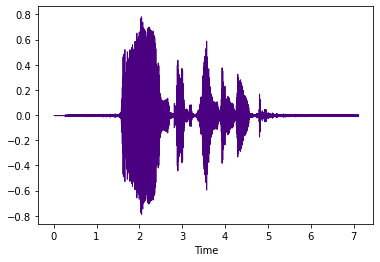

In [10]:
librosa.display.waveshow(signal,color='indigo')

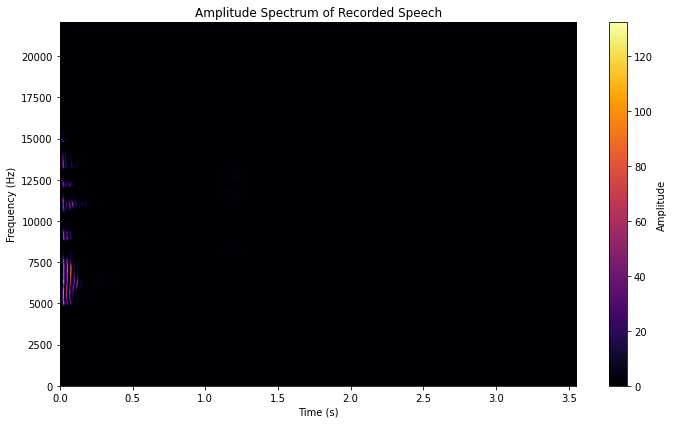

In [42]:
# Function to extract STFT features from a speech signal
def extract_stft_features(signal, n_fft=2048, hop_length=512):
    stft = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))
    return stft

recorded_speech, sr = librosa.load("AI-in-Speech-processing.wav", sr=None)

# Extract STFT features from the recorded speech
stft_features = extract_stft_features(recorded_speech)

# Plot the amplitude spectrum of the recorded speech
plt.figure(figsize=(10,6))
plt.title('Amplitude Spectrum of Recorded Speech')
plt.imshow(stft_features.T, aspect='auto', origin='lower', cmap='inferno', extent=[0, len(recorded_speech)/sr, 0, sr/2])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()

In [52]:
n_components = 3 
n_iter = 100  

# Train the HMM model
model = hmm.GaussianHMM(n_components=n_components, n_iter=n_iter)
model.fit(stft_features.T)

# Perform classification
predicted_labels = model.predict(stft_features.T)  
predicted_class = np.argmax(np.bincount(predicted_labels)) 

print("Predicted class:", predicted_class)

Predicted class: 1


In [53]:
# Performing the classification task
predicted_labels = model.predict(stft_features.T)

# Printing the state sequences
print("State Sequence is:")
print()
print(predicted_labels)

State Sequence is:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 1 2 2 0 0 0 2 2 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


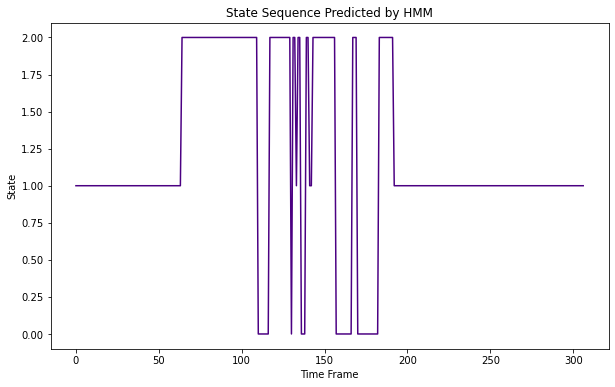

In [63]:
# Plotting the state sequence predicted by the HMM
plt.figure(figsize=(10,6))
plt.title('State Sequence Predicted by HMM')
plt.plot(predicted_labels,color='indigo')
plt.xlabel('Time Frame')
plt.ylabel('State')
plt.show()

c:\Users\rayva\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


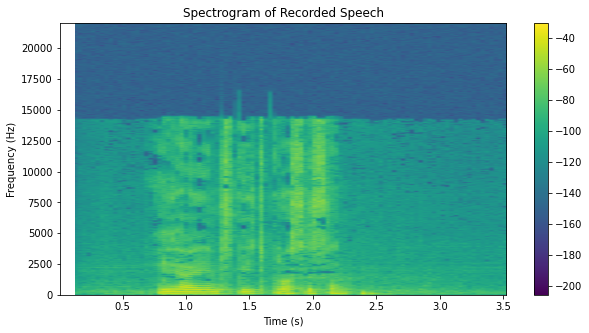

In [59]:
# Plotting the spectrogram of the recorded speech
plt.figure(figsize=(10,5))
plt.title('Spectrogram of Recorded Speech')
plt.specgram(recorded_speech,NFFT=2048,Fs=sr,noverlap=512,cmap='viridis')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.show()

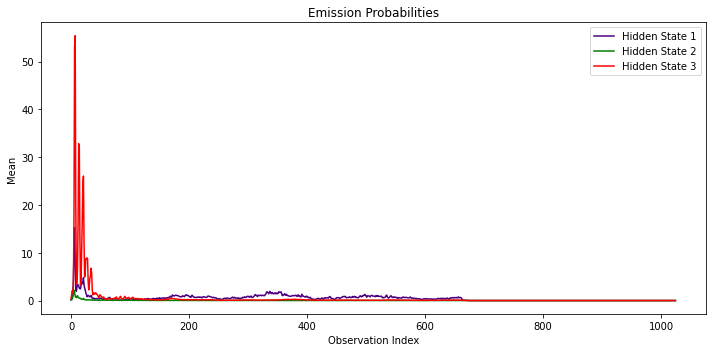

In [64]:
colors = ['indigo', 'green', 'red'] 

# Plot the means of the Gaussian distributions (emission probabilities)
plt.figure(figsize=(10,5))
plt.title('Emission Probabilities')
for i in range(model.n_components):
    plt.plot(model.means_[i],label=f'Hidden State {i+1}',color=colors[i])

plt.xlabel('Observation Index')
plt.ylabel('Mean')
plt.legend()
plt.tight_layout()
plt.show()